In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df1.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- **conclusion**

  - for senior citizen the colum is not valid for 25%,50%,75% distribution , because it is categorical.

  - only 25% customer is having tenure greter than 55 months while avrage tenure is 32 months.
  
  - 25% customer pays more than 89.It means 75% people pay less then 89$
  


In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
round((df['Churn'].value_counts() * 100)/df.shape[0])

No     73.0
Yes    27.0
Name: Churn, dtype: float64

**conclusion:- Highly Imblaced Data**

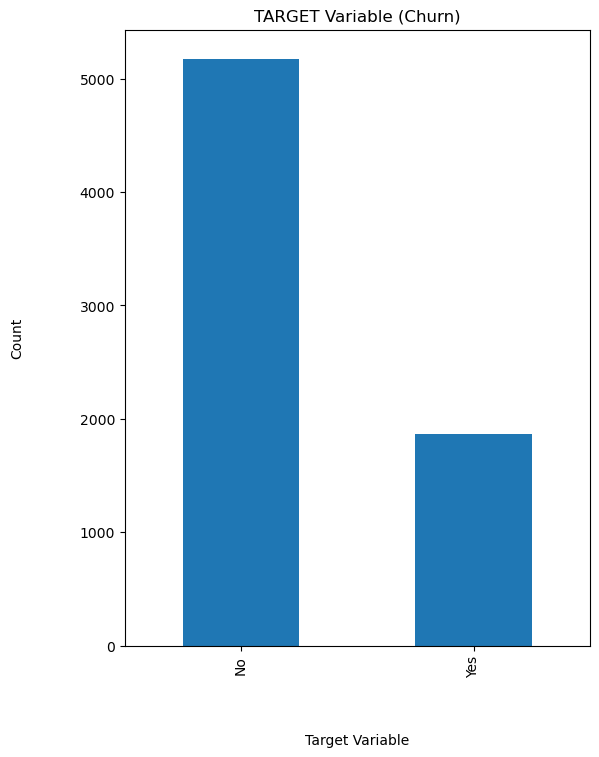

In [9]:
df['Churn'].value_counts().plot(kind='bar', figsize=(6, 8))
plt.ylabel("Count", labelpad=40)
plt.xlabel("Target Variable", labelpad=40)
plt.title("TARGET Variable (Churn)");


# **DATA CLEANING**

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- **We Have To Change The Data Types Of TotalCharges, Because It contains String Value**. 


- **We have to convert it into numeric.**


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
df['TotalCharges'].dtypes

dtype('float64')

**Handling Missing Values**

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

[]

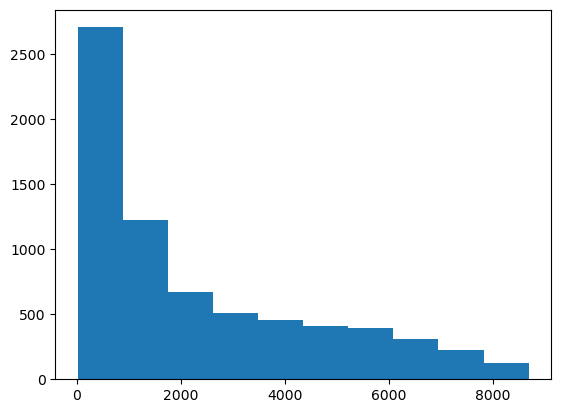

In [14]:
plt.hist(df["TotalCharges"])
plt.plot()

- **CONCLUSION**

  - This Graph Is Rightly Skewed.
   
  - We can replace Missing Value With Median 

In [15]:
df["TotalCharges"].replace(np.nan, df["TotalCharges"].median(),inplace=True)

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Handling Outlier**

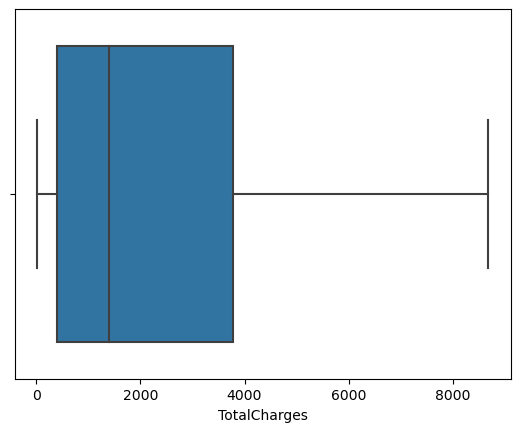

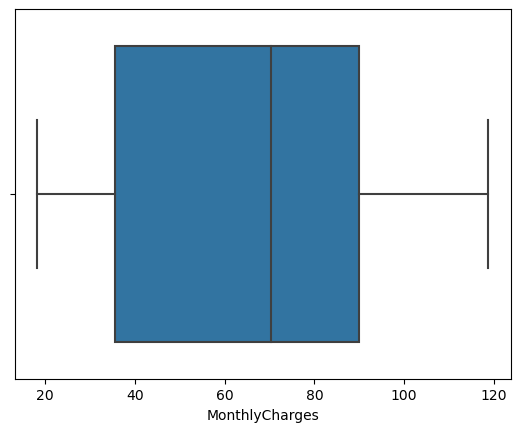

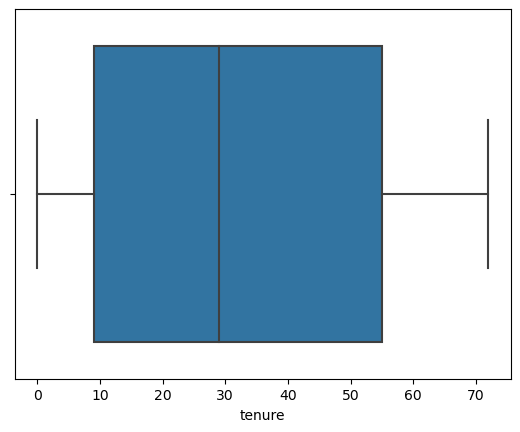

In [17]:
# Finding Outliers

data1 = df.loc[:, ['TotalCharges', 'MonthlyCharges','tenure']]

for i , col in enumerate(data1.columns):
  plt.figure(i)
  sns.boxplot(x = col , data= data1)


- **There Is No Outliers In This Columns.**

## **Converting continous into Categorical Variable:** 

In [18]:

print(df['tenure'].max())


72


In [19]:
labels = ["1 year","2 year", "3 year","4 year","5 year","6 year" ]
# cutting into bins
df['tenure_group'] = pd.cut(df.tenure, range(1, 74, 12), right=False, labels=labels)
df['tenure_group']

0       1 year
1       3 year
2       1 year
3       4 year
4       1 year
         ...  
7038    2 year
7039    6 year
7040    1 year
7041    1 year
7042    6 year
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 year' < '2 year' < '3 year' < '4 year' < '5 year' < '6 year']

In [20]:

df['tenure_group'].value_counts()


1 year    2175
6 year    1407
2 year    1024
3 year     832
5 year     832
4 year     762
Name: tenure_group, dtype: int64

- **columns not required in processing should be droped**

    - Here Customer_Id Is Unique For Each Person.....

    - tenure is converted into bins and stored in new attribute 'tenure_group'

In [21]:
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3 year
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4 year
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 year


# **EDA**

- Here Our Target Variable Is 'Churn' And It Is Categorical

- We need to perform classification because our target variable is Categorical

- So We Can Perform Two Test To Check Either Other Variable Is Related With Target Variable Or Not.

  - ANOVA

    - To Check Continues Variable Is Related With Categorical Variable

    - ['TotalCharges', 'MonthlyCharges']

  - CHISQUARE

    - To Check Categorical Variable Is Related With Categorical Variable

    - All Other Attribute



  - We can Select continues attribute based on two methods

    - visulation
  
      - BOXPLOT

    - statistic

      - ANOVA



**BOXPLOT**

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

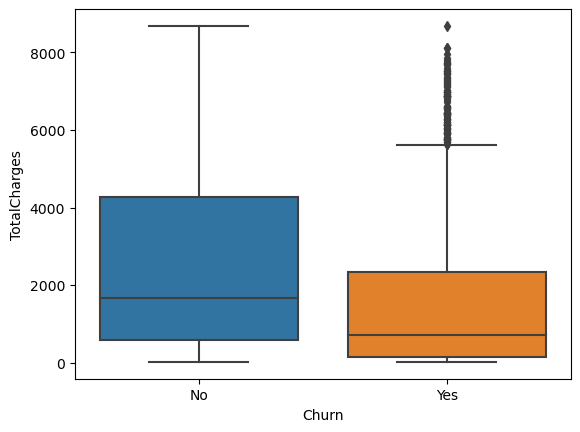

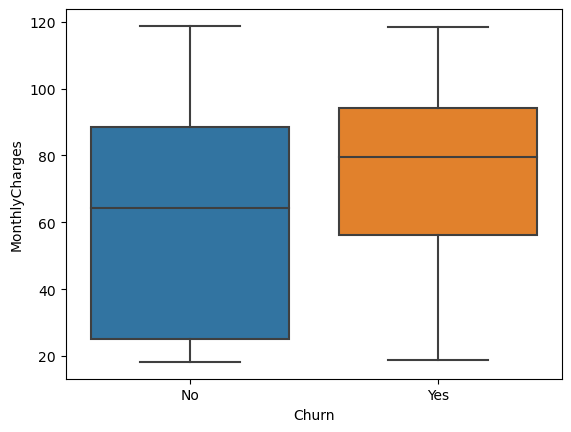

In [24]:
cate = ['TotalCharges','MonthlyCharges']

for i, col in enumerate(cate):
    plt.figure(i)
    sns.boxplot(x=df["Churn"] , y=df[col])


In [25]:
# Statistic
import scipy
from scipy import stats
def select_cats(cat):

  grouped_test2=df[['Churn' , cat]].groupby(['Churn'])
  f_val, p_val = stats.f_oneway(*(grouped_test2.get_group(val)[cat] for val in df['Churn'].unique()))
  # print( "ANOVA results: F=", f_val, ", P =", p_val)  

  dfn1 = len(df['Churn'].unique()) - 1
  dfd1 = len(df['Churn'].index) - len(df['Churn'].unique())
  # print(f"dfn1 is {dfn1} and dfd1 is {dfd1}  ")

  f_crit = scipy.stats.f.ppf(q=1-.05, dfn=dfn1, dfd=dfd1)

  # print(f" Critical Value Is {f_crit} ")

  if f_val > f_crit and p_val < 0.05:
    print("Attribute Accepted ")
  else:
    print("Attribute Regected ")

cate = ['TotalCharges','MonthlyCharges']

for col in cate:
   select_cats(col)


Attribute Accepted 
Attribute Accepted 


**showing the relation between monthly charges and total charges**


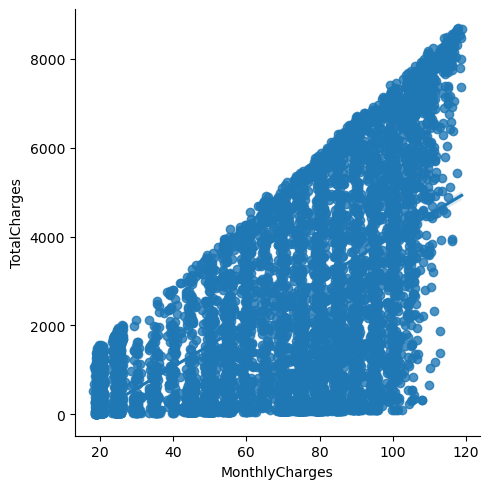

In [26]:
sns.lmplot(data=df,x = 'MonthlyCharges' , y = 'TotalCharges' )

**here the monthly charges and the total charges is highly correlated**


<AxesSubplot:>

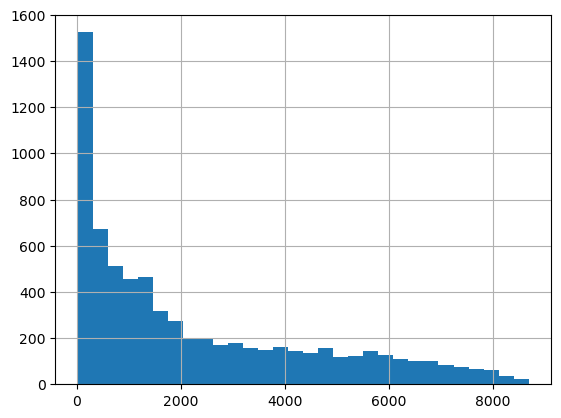

In [27]:
# checking their variance 

a = df['TotalCharges'].var()
a

b = (df['MonthlyCharges']*12).var()
b

df['TotalCharges'].hist(bins =30)

<AxesSubplot:>

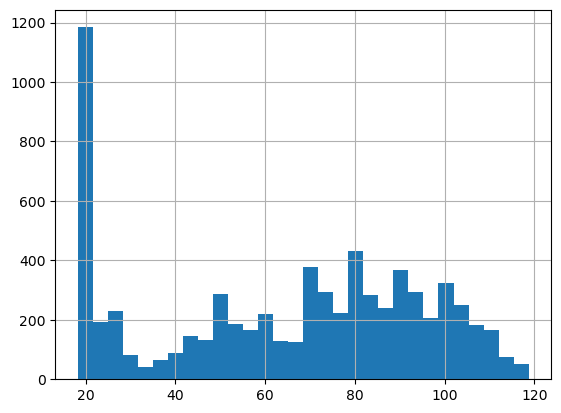

In [28]:
df['MonthlyCharges'].hist(bins =30)

**the distributuon of this two attribute is diffrent so enven after this attribute is highly correlated we can not drop any single attribute from two**



---


  - We can Select categorical attribute based on two methods

    - visulation
  
      - CROSS-TAB

    - statistic

      - CHISQUARE

# **CROSS-TAB**

In [29]:
di = {0:'No', 1:'Yes'}

df['SeniorCitizen'] = df['SeniorCitizen'].map(di)
df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [31]:
catdf=df.select_dtypes(include="object")

for col in catdf.columns:
    print("cross tab for ",col)
    print()
    ct=pd.crosstab(index=catdf[col],columns=df["Churn"],normalize='index',dropna=True)
    print(ct)
    print("___________")
    print('\n\n\n')

[]

cross tab for  gender

Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
___________




cross tab for  SeniorCitizen

Churn                No       Yes
SeniorCitizen                    
No             0.763938  0.236062
Yes            0.583187  0.416813
___________




cross tab for  Partner

Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649
___________




cross tab for  Dependents

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502
___________




cross tab for  PhoneService

Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096
___________




cross tab for  MultipleLines

Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.2492

[]

In [32]:
rejected_li = []
accepted_li = []
def chiSquare(col):
  chi_data=pd.crosstab(index=df[col],columns=df['Churn'])
  (chi2,p,dof,_)=scipy.stats.chi2_contingency([*(chi_data.iloc[i].values for i in range(len(chi_data)))])

  crit=scipy.stats.chi2.ppf(1-0.05, dof)

  # print(col, end= " ")
  if chi2>crit:
      # print(" attribute is accepted")
      accepted_li.append(col)
  else:
      # print(" attribute rejected")
      rejected_li.append(col)

for col in catdf.columns:
  chiSquare(col)

print('Rejected Attribute Are')
print(rejected_li)

print('Accepted Attribute Are')
print(accepted_li)

Rejected Attribute Are
['gender', 'PhoneService']
Accepted Attribute Are
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']




---





**Converting churn data intu numeric format**

In [33]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

# ***Bivariant analysis***

In [34]:
df_nochurn=df.loc[df["Churn"]==0]
df_churn=df.loc[df["Churn"]==1]

df_churn

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 year
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 year
5,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 year
8,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,3 year
13,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,No,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1,1 year
7026,Female,No,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1,1 year
7032,Male,Yes,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,1 year
7034,Female,No,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,6 year


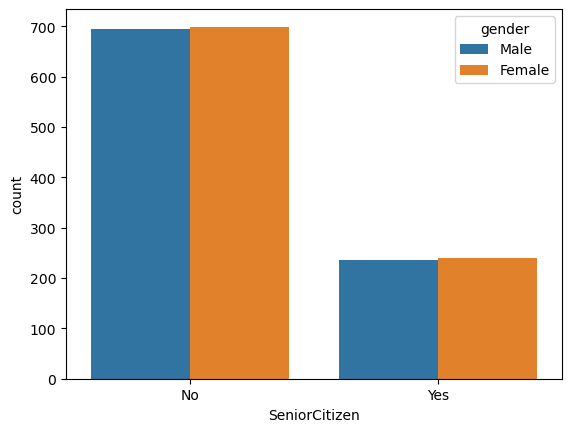

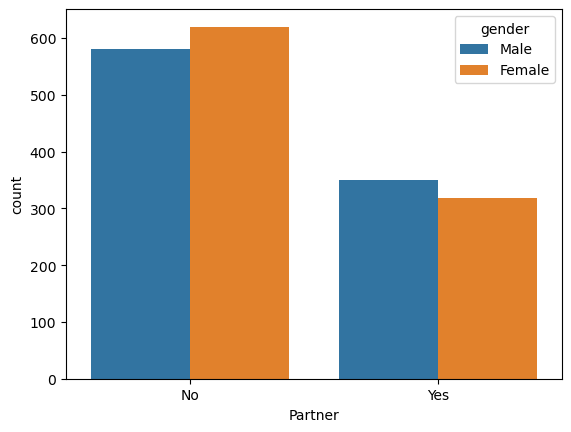

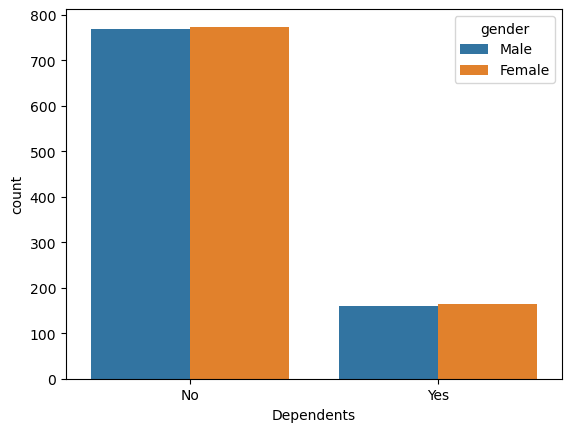

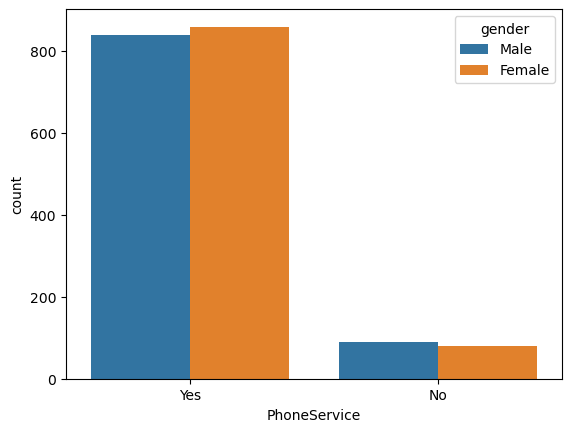

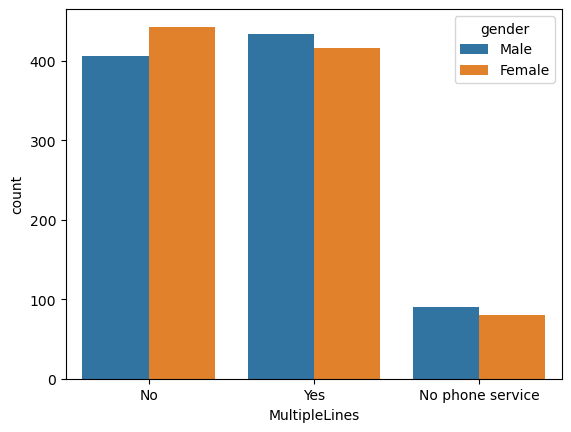

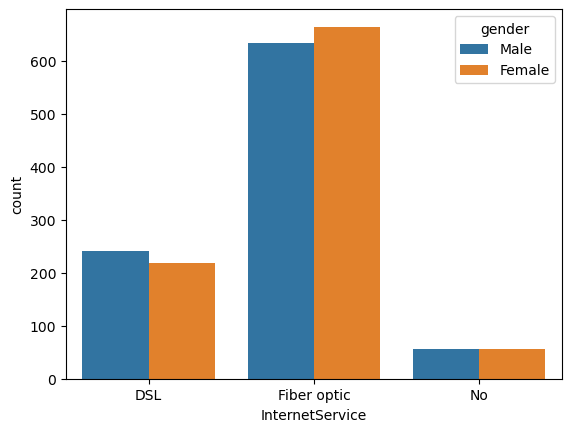

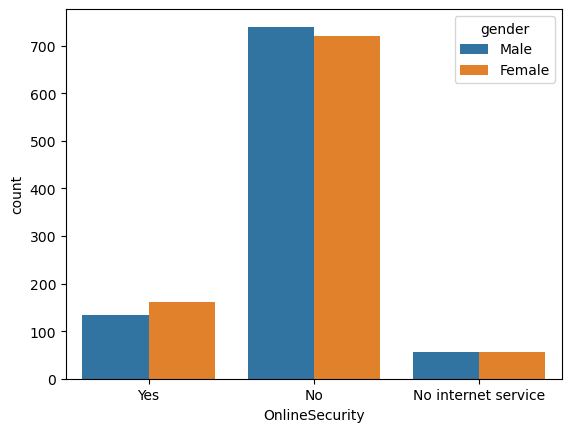

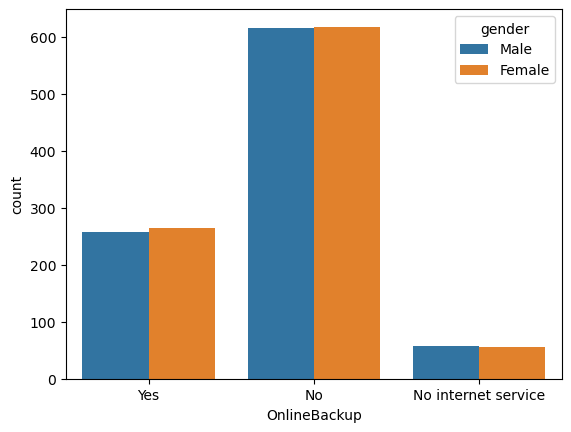

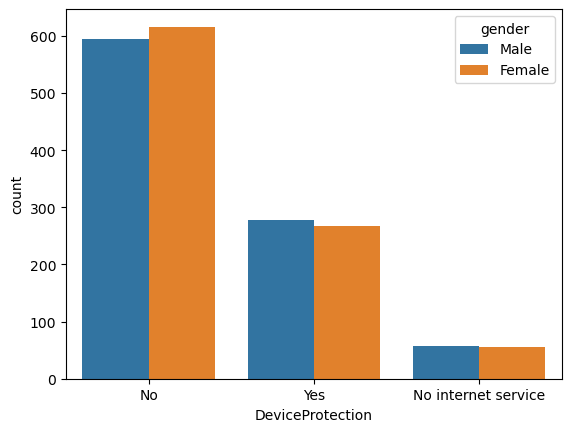

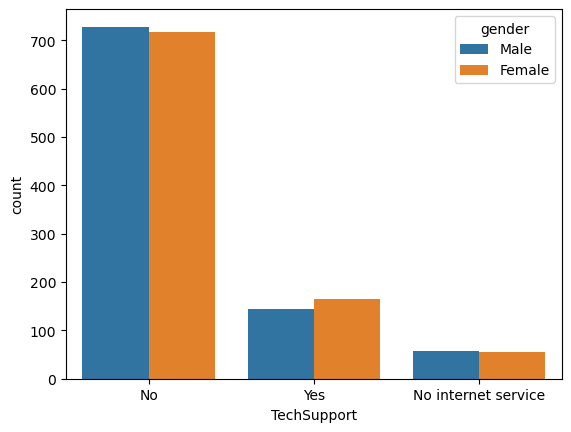

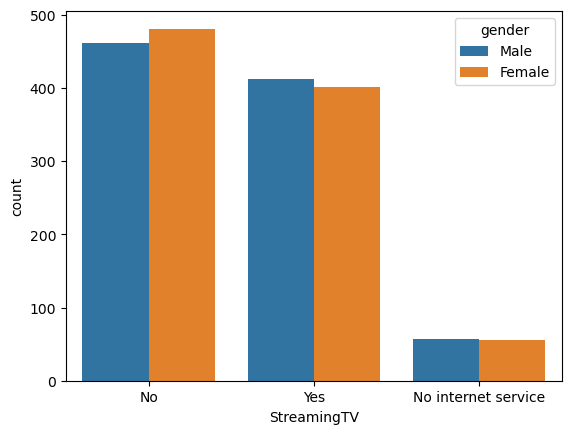

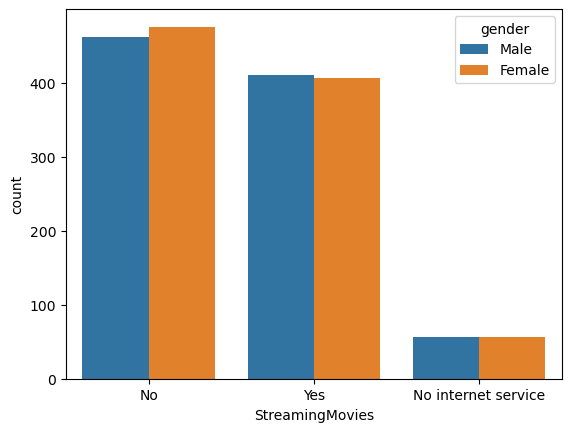

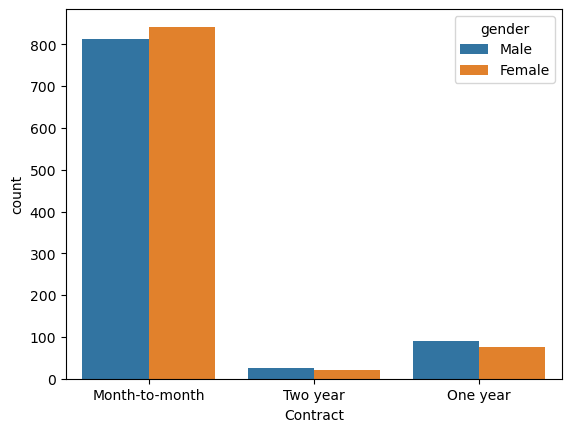

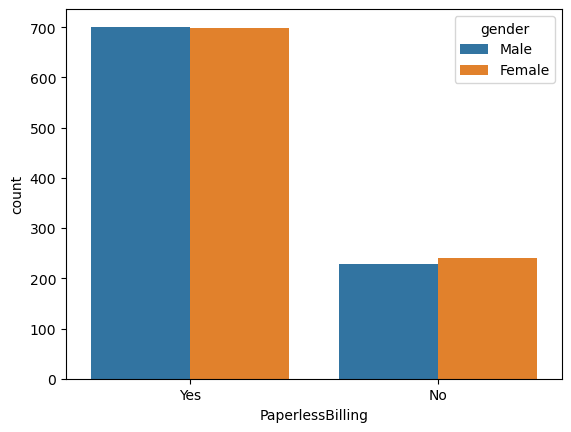

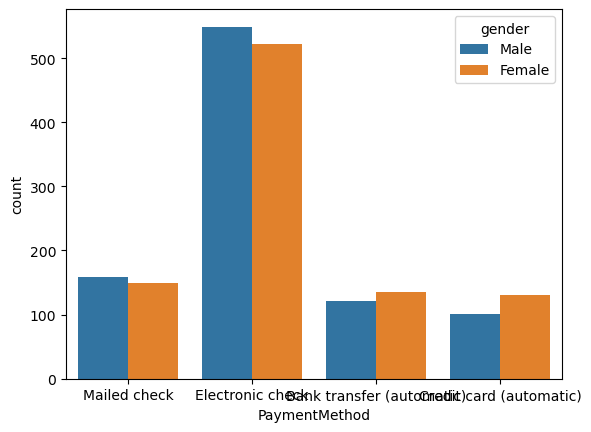

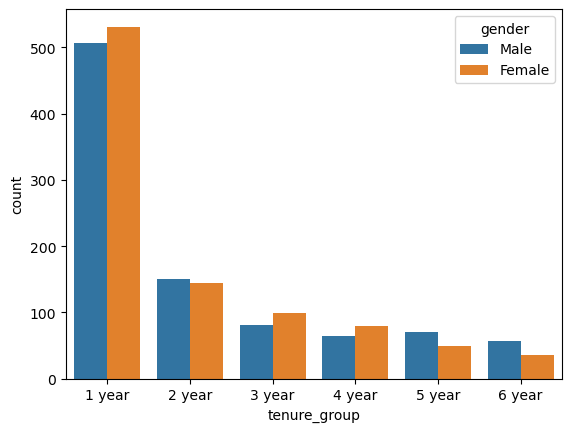

In [35]:
df_for_bivariant = df_churn.drop(['gender','MonthlyCharges','TotalCharges','Churn'],axis=1)

for i in df_for_bivariant.columns:
  sns.countplot(data = df_churn, x= i,hue = 'gender')
  plt.show()
  # plt.legend(loc = (1.5 , 0.5))


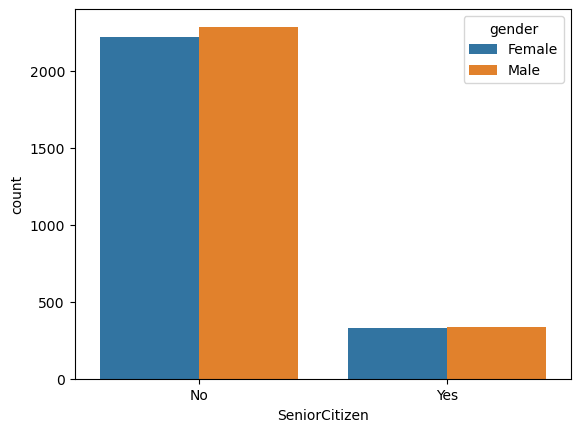

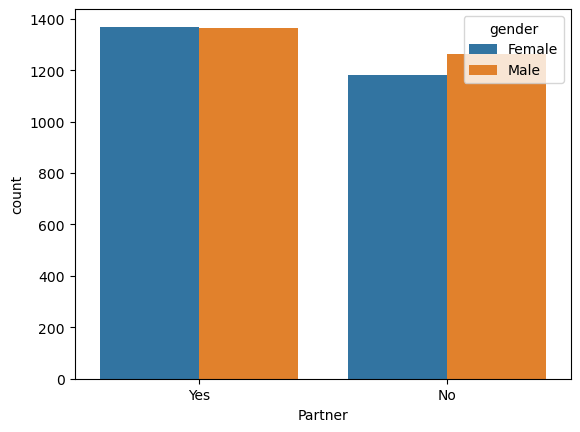

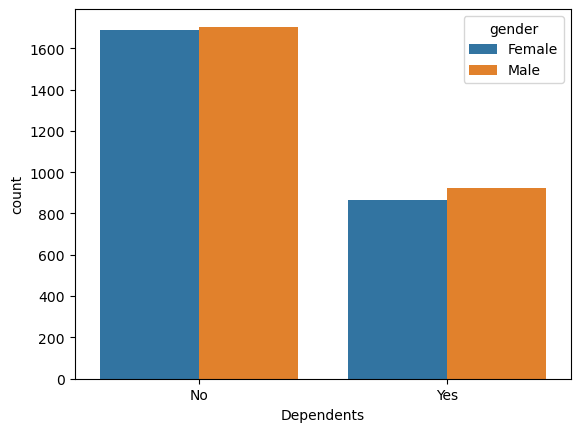

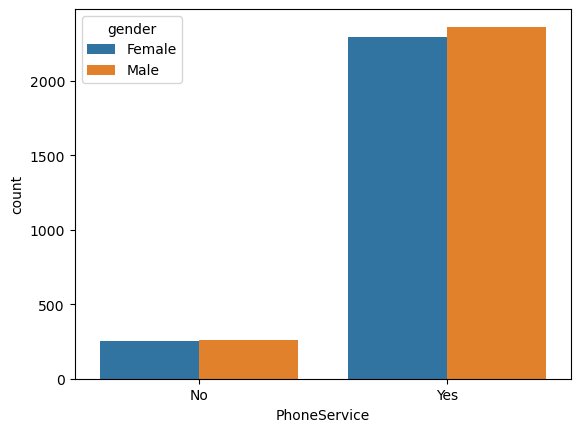

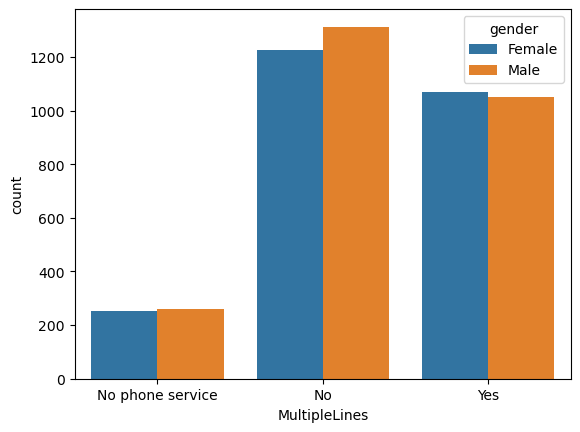

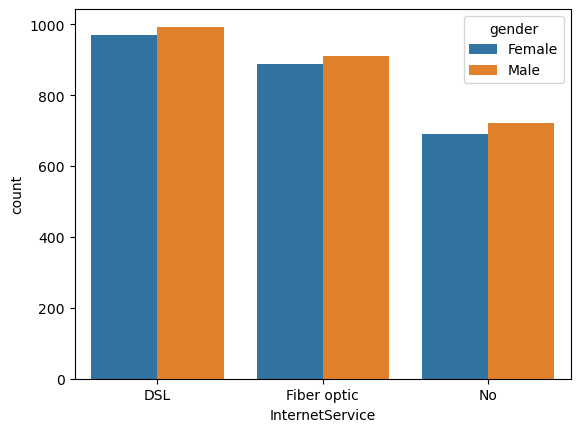

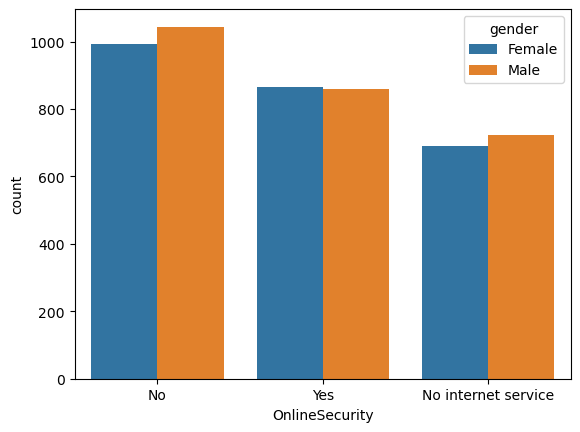

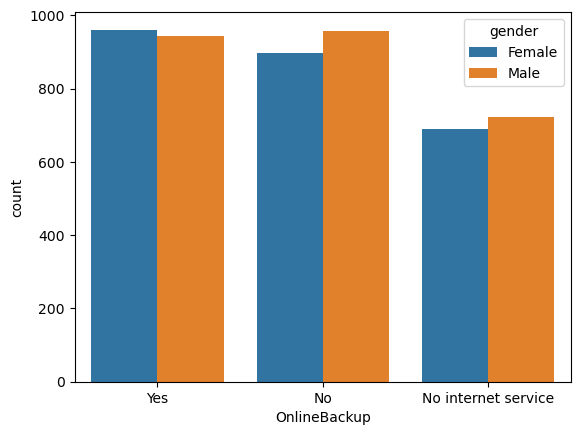

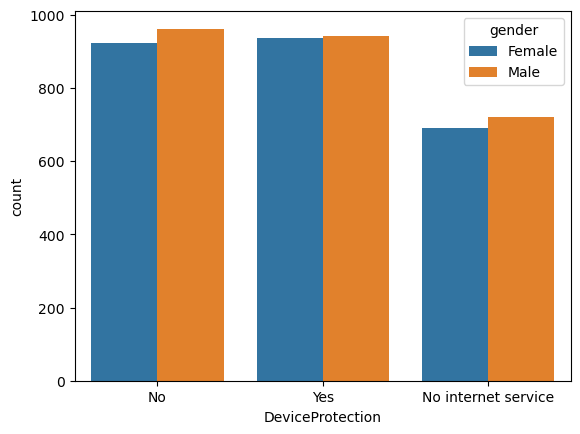

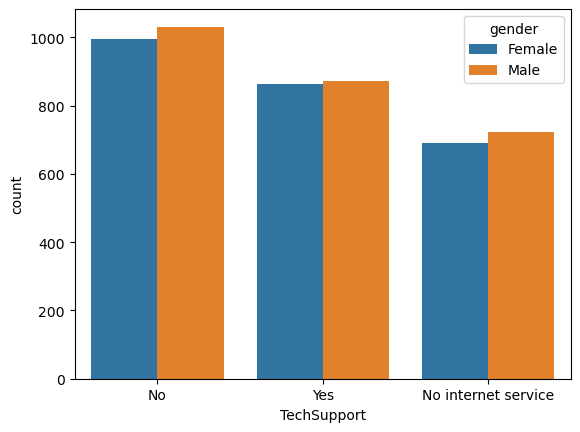

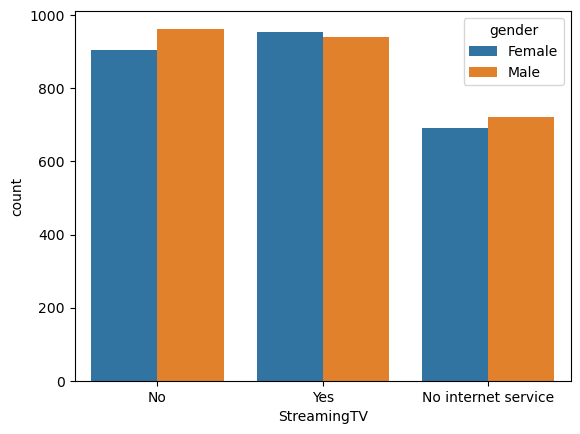

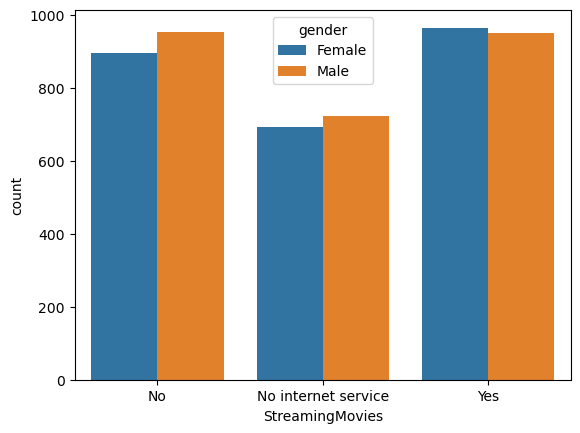

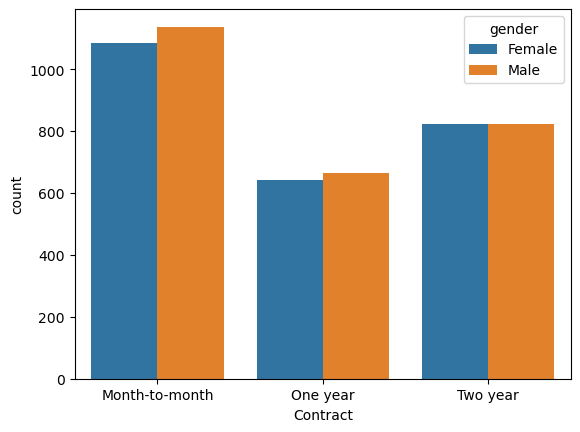

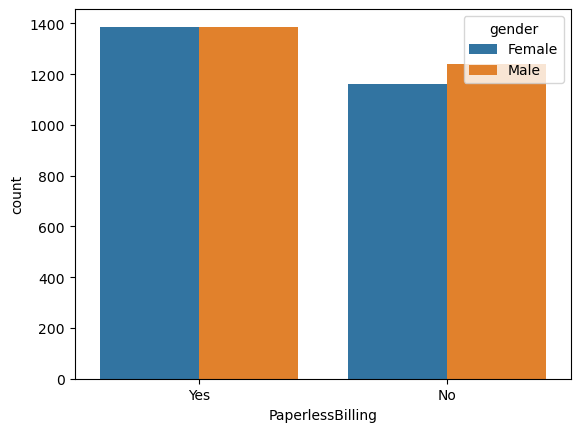

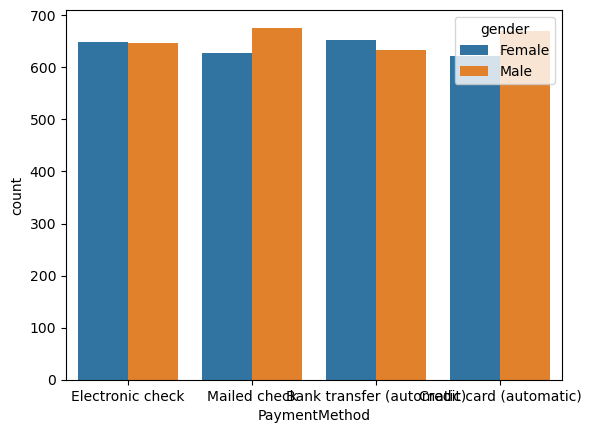

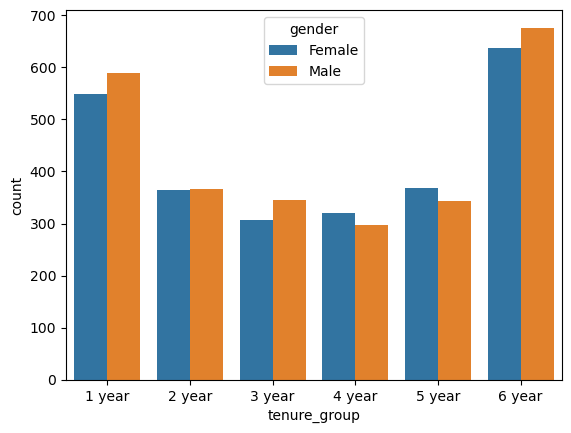

In [36]:
for i in df_for_bivariant.columns:
  sns.countplot(data = df_nochurn, x= i,hue = 'gender')
  plt.show()
  # plt.legend(loc = (1.5, 0.5))

**Conclusion Of Bivariant Analysis : all the attributes seems to be important expact the gender**

In [37]:
df.to_csv('churn_clean.csv')

# Model Building

In [38]:
# converting data into numeric format by using pd.get_dummies

new_df = pd.get_dummies(df)
new_df

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,103.20,7362.90,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,29.60,346.45,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,74.40,306.60,1,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [39]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [40]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [41]:
new_df_copy = new_df.copy(deep=True)
new_df_copy

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,103.20,7362.90,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,29.60,346.45,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,74.40,306.60,1,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [42]:
new_df

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,103.20,7362.90,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,29.60,346.45,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,74.40,306.60,1,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


## **DecisionTreeClassification**



In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

new_df.drop(['Churn'],axis = 1 , inplace = True)


# split
x_train, x_test, y_train, y_test = train_test_split(new_df, df['Churn'], test_size =0.39, random_state = 5)


# fit
DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train,y_train)

# predict
y_pred = DT.predict(x_test)


print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2032
           1       0.49      0.50      0.50       715

    accuracy                           0.74      2747
   macro avg       0.66      0.66      0.66      2747
weighted avg       0.74      0.74      0.74      2747



## having highly imbalanced data is now causing error for prediction , all we can do is to add dummy data that having output as lower count of target variable 

In [44]:
new_df_copy_1 = new_df_copy[new_df_copy['Churn'] == 1]

new_df_copy_1.head(2)

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [45]:
new_df_copy_1.reset_index(drop=True, inplace=True)

balanced_df = new_df_copy.append(new_df_copy_1)

balanced_df

C:\Users\158359\AppData\Local\Temp\ipykernel_12304\2561730885.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = new_df_copy.append(new_df_copy_1)


,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,59.80,727.80,1,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1865,44.20,403.35,1,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1866,75.75,75.75,1,0,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1867,102.95,6886.25,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [46]:
balanced_df.append(new_df_copy_1)

C:\Users\158359\AppData\Local\Temp\ipykernel_12304\818376143.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df.append(new_df_copy_1)


,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 year,tenure_group_2 year,tenure_group_3 year,tenure_group_4 year,tenure_group_5 year,tenure_group_6 year
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,59.80,727.80,1,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1865,44.20,403.35,1,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1866,75.75,75.75,1,0,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1867,102.95,6886.25,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


## **Now finaly our data is nearby balanced**

In [47]:
y = balanced_df['Churn']
balanced_df.drop(['Churn'],axis=1,inplace=True)

# split
x_train, x_test, y_train, y_test = train_test_split(balanced_df, y, test_size =0.2)


# fit
DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train,y_train)

# predict
y_pred = DT.predict(x_test)


print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1009
           1       0.78      0.91      0.84       774

    accuracy                           0.85      1783
   macro avg       0.85      0.86      0.85      1783
weighted avg       0.86      0.85      0.85      1783



## **Random forest**



In [48]:
from sklearn.ensemble import RandomForestClassifier 

# split
x_train, x_test, y_train, y_test = train_test_split(balanced_df, y, test_size =0.1)

# fit
classifier= RandomForestClassifier(n_estimators= 200, criterion="gini")  
classifier.fit(x_train, y_train)  

# predict
y_pred_rf= classifier.predict(x_test)



In [49]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred_rf)
conmat

array([[470,  71],
       [  9, 342]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       541
           1       0.83      0.97      0.90       351

    accuracy                           0.91       892
   macro avg       0.90      0.92      0.91       892
weighted avg       0.92      0.91      0.91       892



In [51]:
from joblib import dump
dump(classifier, 'random_forest.joblib')

['random_forest.joblib']

## **Logistic regression**

In [52]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  

# making copy
balanced_df_copy = balanced_df.copy()

#  split
x_train, x_test, y_train, y_test= train_test_split(balanced_df_copy, y, test_size= 0.1, random_state=3) 


# scale
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

# fit
classifier= LogisticRegression(random_state=3)  
classifier.fit(x_train, y_train) 

# predict
y_pred_lr= classifier.predict(x_test)

# precison and recall
print(classification_report(y_test, y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       530
           1       0.74      0.74      0.74       362

    accuracy                           0.79       892
   macro avg       0.78      0.78      0.78       892
weighted avg       0.79      0.79      0.79       892



### till here the random forest has given the highest recall and presion now using cross validation on it

In [53]:
from sklearn.model_selection import cross_val_score

score_rf=cross_val_score(RandomForestClassifier(n_estimators=200), balanced_df, y,cv=10,  scoring='recall')
print(score_rf)
print("Avg :",np.average(score_rf))

[0.99197861 0.9973262  1.         0.99731903 0.99197861 0.99465241
 0.9973262  1.         0.99465241 0.99465241]
Avg : 0.9959885879772331
